# **Data Visualization**


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-10-22 16:52:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  9.58MB/s    in 3.8s    

2024-10-22 16:52:34 (9.14 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


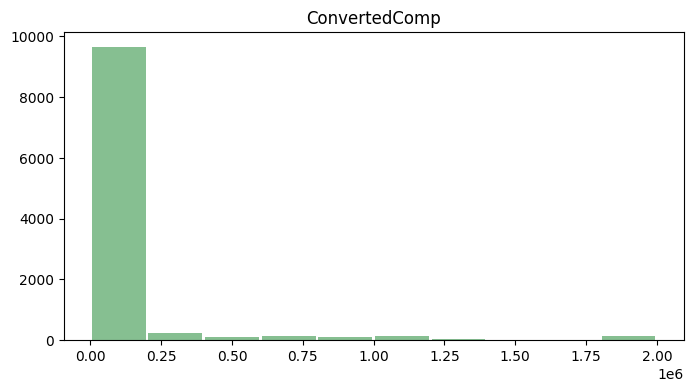

In [8]:
QUERY = """
SELECT ConvertedComp FROM master
"""
ConvertedComp_df = pd.read_sql_query(QUERY, conn)
ConvertedComp_df.hist(rwidth=0.95, grid=False, color='#86bf91', figsize=(8, 4))
plt.show()

### Box Plots


Plot a box plot of `Age.`


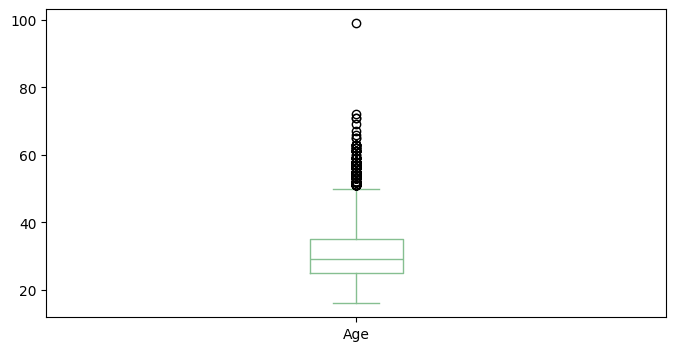

In [9]:
QUERY = """
SELECT Age FROM master
"""
age_df = pd.read_sql_query(QUERY, conn)
age_df.boxplot(column=['Age'], grid=False, color='#86bf91', figsize=(8, 4))
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


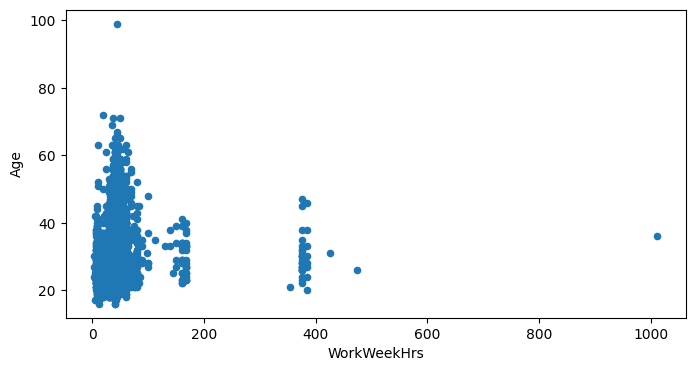

In [10]:
QUERY = """
SELECT Age, WorkWeekHrs FROM master
"""
age_WorkWeekHrs_df = pd.read_sql_query(QUERY, conn)

age_WorkWeekHrs_df.plot(kind='scatter', x='WorkWeekHrs', y='Age', figsize=(8, 4))
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


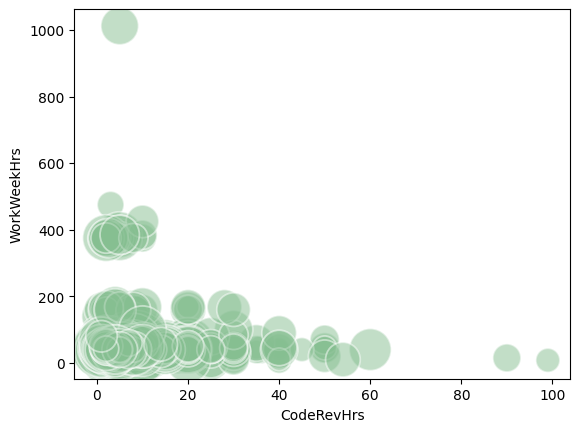

In [11]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs FROM master
"""
awc_df = pd.read_sql_query(QUERY, conn)
sns.scatterplot(data=awc_df, x="CodeRevHrs", y="WorkWeekHrs",
                size="Age",
                legend=False,
                sizes=(10, 3000),
                alpha=0.5,
                color="#86bf91")
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


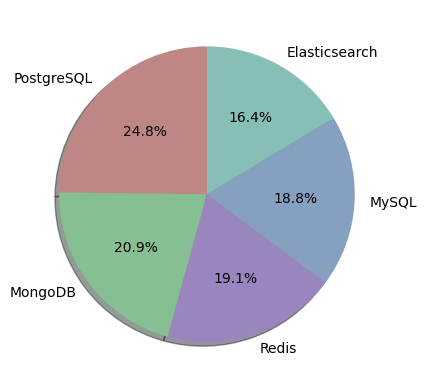

In [12]:
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as Number
FROM DatabaseDesireNextYear
GROUP by DatabaseDesireNextYear
ORDER by Number DESC
LIMIT 5
"""

db_df = pd.read_sql_query(QUERY, conn)

colors = ("#bf8686", "#86bf91", "#9a86bf",
          "#86a0bf", "#86bfb6")
fig1, ax1 = plt.subplots()
ax1.pie(db_df['Number'], labels=db_df['DatabaseDesireNextYear'], autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
plt.show()

Create a pie chart of most popular languages respondents wish to learn next year.

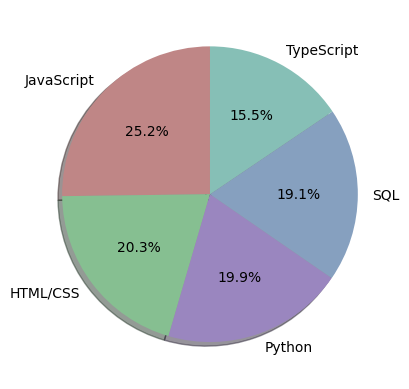

In [13]:
QUERY = """
SELECT LanguageDesireNextYear, COUNT(*) as Number
FROM LanguageDesireNextYear
GROUP by LanguageDesireNextYear
ORDER by Number DESC
LIMIT 5
"""

db_df = pd.read_sql_query(QUERY, conn)

colors = ("#bf8686", "#86bf91", "#9a86bf",
          "#86a0bf", "#86bfb6")
fig1, ax1 = plt.subplots()
ax1.pie(db_df['Number'], labels=db_df['LanguageDesireNextYear'], autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


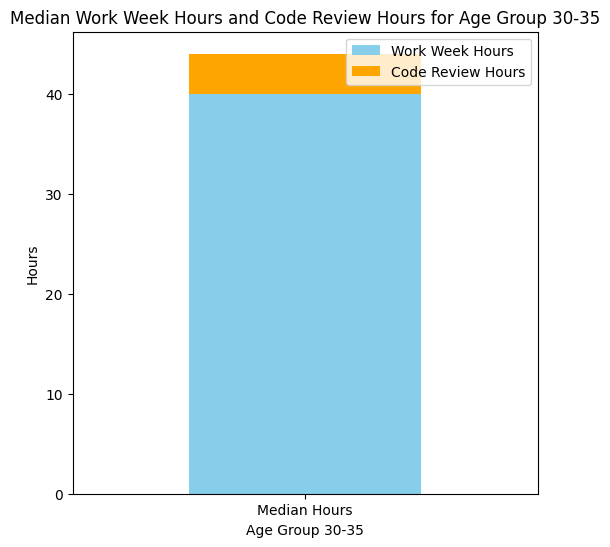

In [14]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35;
"""

median_df = pd.read_sql_query(QUERY, conn)

median_workweekhrs = median_df['WorkWeekHrs'].median()
median_coderevhrs = median_df['CodeRevHrs'].median()

categories = ['Median Hours']
workweek_data = [median_workweekhrs]
coderev_data = [median_coderevhrs]

# Plotting the stacked bar chart
plt.figure(figsize=(6, 6))
plt.bar(categories, workweek_data, label='Work Week Hours', color='skyblue')
plt.bar(categories, coderev_data, bottom=workweek_data, label='Code Review Hours', color='orange')
plt.xlim(-median_coderevhrs*0.2, median_coderevhrs*0.2)

# Adding labels and title
plt.xlabel('Age Group 30-35')
plt.ylabel('Hours')
plt.title('Median Work Week Hours and Code Review Hours for Age Group 30-35')
plt.legend()

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


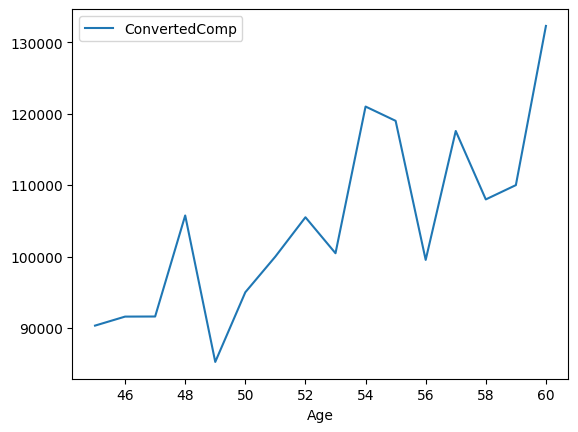

In [15]:
QUERY = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 45 AND 60
"""

db_df = pd.read_sql_query(QUERY, conn)
db_df = db_df.dropna()
db_df = db_df.groupby(['Age']).median()
db_df.plot.line()
plt.show()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


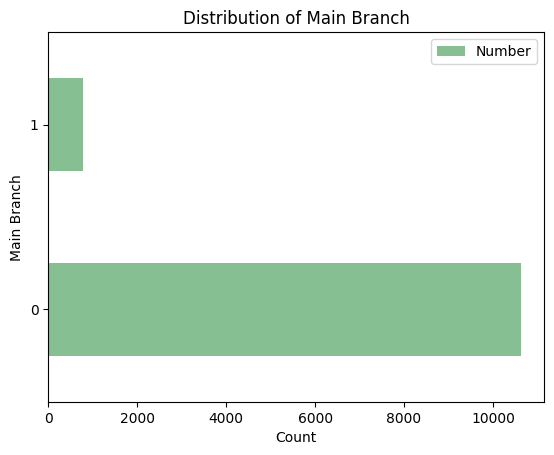

In [16]:
QUERY = """
SELECT MainBranch, COUNT(*) as Number
FROM master GROUP BY MainBranch
"""
df = pd.read_sql_query(QUERY, conn)
df.plot(kind='barh', color='#86bf91')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.title('Distribution of Main Branch')
plt.show()

Close the database connection.


How many respondents indicated that they currently work with 'SQL'

In [17]:
QUERY = """
SELECT COUNT(*)
FROM LanguageWorkedWith 
WHERE LanguageWorkedWith == 'SQL'
"""
SQL_num = pd.read_sql_query(QUERY, conn)
SQL_num

,COUNT(*)
0,7106


How many respondents indicated that they work on 'MySQL' only

In [18]:
QUERY = """
SELECT Respondent, COUNT(Respondent) as Number
FROM DatabaseWorkedWith
GROUP BY Respondent
HAVING COUNT(Respondent) = 1 and 
DatabaseWorkedWith == 'MySQL'
"""

SQL_num = pd.read_sql_query(QUERY, conn)
SQL_num

,Respondent,Number
0,25,1
1,129,1
2,147,1
3,148,1
4,194,1
...,...,...
469,25007,1
470,25012,1
471,25091,1
472,25111,1


In [71]:
conn.close()

 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
